##  Deep Learning: Classifying Irish Data.
First we need to convert the species column in binary form. Next we retrieve the data as a list and convert back as an array

In [70]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

#Importing and reading data.
Iris= pd.read_csv("Iris.csv")
# Since our data is seperated by semicolons we need to do sep=";"
Iris=Iris.iloc[:,[1,2,3,4,5]]
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
#Reshuffling the data
Iris= shuffle(Iris)
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,5.5,3.5,1.3,0.2,Iris-setosa
111,6.4,2.7,5.3,1.9,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor


In [72]:
Iris_list=Iris.values.tolist()
for i in range(len(Iris_list)):
    if(Iris_list[i][4]=='Iris-versicolor'):
        Iris_list[i][4]=0
    elif (Iris_list[i][4]=='Iris-setosa'):
         Iris_list[i][4]=1
    else:
         Iris_list[i][4]=2
        
data=pd.DataFrame(Iris_list)
X=data.iloc[:,[0,1,2,3]]
y=data.iloc[:,[4]]


In [105]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=4, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=model.fit(X_train, y_train,validation_split=0.1, epochs=100, batch_size=10)

Epoch 1/100
10/10 [==============================] - 1s 51ms/step - loss: 1.2256 - accuracy: 0.3982 - val_loss: 1.0710 - val_accuracy: 0.1818
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9305 - accuracy: 0.4052 - val_loss: 0.7877 - val_accuracy: 0.7273
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7458 - accuracy: 0.7323 - val_loss: 0.6141 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6260 - accuracy: 0.7585 - val_loss: 0.5068 - val_accuracy: 0.7273
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7765 - val_loss: 0.4189 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4753 - accuracy: 0.9169 - val_loss: 0.3648 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4259 - accuracy: 0.9650 - val_loss: 0.3302 - val_accuracy: 1.0000
Epoch 8/10

Epoch 59/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0623 - accuracy: 0.9844 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0580 - accuracy: 0.9704 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0850 - accuracy: 0.9517 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0507 - accuracy: 0.9683 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0438 - accuracy: 0.9849 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 64/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0510 - accuracy: 0.9774 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0483 - accuracy: 0.9836 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 

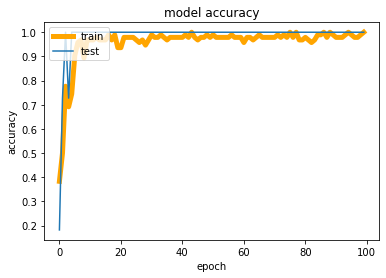

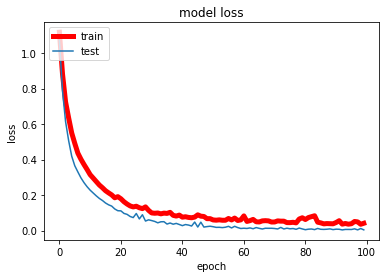

In [107]:
import matplotlib.pyplot as plt
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## IMAGE CLASSIFICATION: MNIST DATASET 

In [76]:
#install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [77]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [78]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
X_train=X_train/255
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


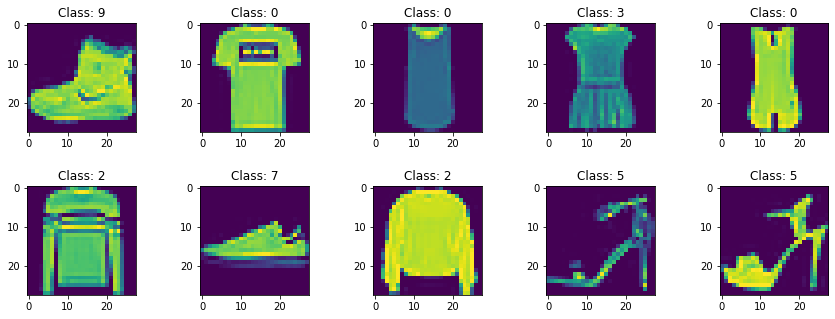

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [114]:
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(100,input_dim = X_train.shape[1], activation='relu'))
classifier_e25.add(Dense(80, activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_54 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                810       
Total params: 9,390
Trainable params: 9,390
Non-trainable params: 0
_________________________________________________________________


In [115]:
model= classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 2.1305 - accuracy: 0.2590 - val_loss: 1.5906 - val_accuracy: 0.7143
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 1.5224 - accuracy: 0.6153 - val_loss: 1.2081 - val_accuracy: 0.7143
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 1.1462 - accuracy: 0.6163 - val_loss: 0.9876 - val_accuracy: 0.7143
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9865 - accuracy: 0.6457 - val_loss: 0.8346 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.8005 - accuracy: 0.8152 - val_loss: 0.7009 - val_accuracy: 0.7429
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7344 - accuracy: 0.6870 - val_loss: 0.6240 - val_accuracy: 0.9714
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6284 - accuracy: 0.8702 - val_loss: 0.5602 - val_accuracy: 1.0000
Epoch 8/100
7/7 [=====

7/7 [==============================] - 0s 9ms/step - loss: 0.0792 - accuracy: 0.9789 - val_loss: 0.0807 - val_accuracy: 1.0000
Epoch 60/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0924 - accuracy: 0.9504 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 61/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0625 - accuracy: 0.9964 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 62/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0674 - accuracy: 0.9831 - val_loss: 0.0806 - val_accuracy: 1.0000
Epoch 63/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0809 - accuracy: 0.9887 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 64/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.9943 - val_loss: 0.1128 - val_accuracy: 0.9143
Epoch 65/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0944 - accuracy: 0.9789 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 66/100
7/7 [===========

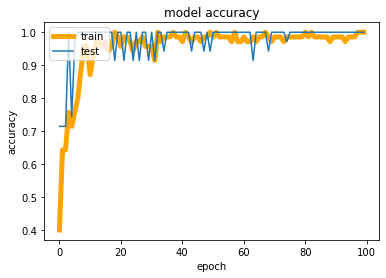

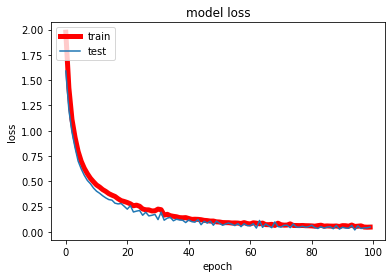

In [116]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CHARACTER CLASSIFICATION:  MNIST DATASET ##

In [84]:
#read mnist fashion dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_train

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

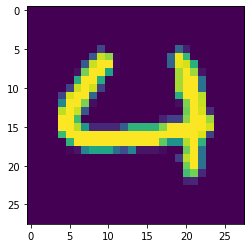

In [85]:
plt.imshow(X_train[60])
  

In [86]:
X_train=X_train/X_train.max()
X_test=X_test/X_train.max()

In [87]:
# Set random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test)) # see ho

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4253 - accuracy: 0.8758 - val_loss: 20.6599 - val_accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109 - accuracy: 0.9661 - val_loss: 19.6268 - val_accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9751 - val_loss: 12.0422 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 15.5001 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 15.1063 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 17.6403 - val_accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 18.0195 - val_ac

In [88]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.
#metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/
#09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [90]:
y_probs = model.predict(X_test) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [91]:
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [92]:
less=[(y_preds[i],y_test[i]) for i in range(9)]
less

[(7, 7), (2, 2), (1, 1), (0, 0), (4, 4), (1, 1), (4, 4), (9, 9), (5, 5)]

In [93]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, 
                 y_pred=y_preds)

array([[ 967,    1,    0,    0,    1,    0,    7,    0,    2,    2],
       [   0, 1129,    0,    0,    0,    1,    2,    0,    3,    0],
       [   5,    3, 1002,    8,    3,    0,    2,    4,    5,    0],
       [   0,    1,    1,  992,    1,    3,    0,    3,    1,    8],
       [   0,    0,    5,    0,  964,    0,    2,    1,    0,   10],
       [   3,    0,    0,   10,    2,  860,   10,    0,    3,    4],
       [   0,    2,    2,    0,    5,    1,  945,    0,    3,    0],
       [   1,   15,   10,    2,    4,    0,    0,  987,    0,    9],
       [   6,    0,    2,    8,    8,    1,    4,    5,  932,    8],
       [   1,    5,    0,    4,   10,    4,    0,    2,    0,  983]])

In [94]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

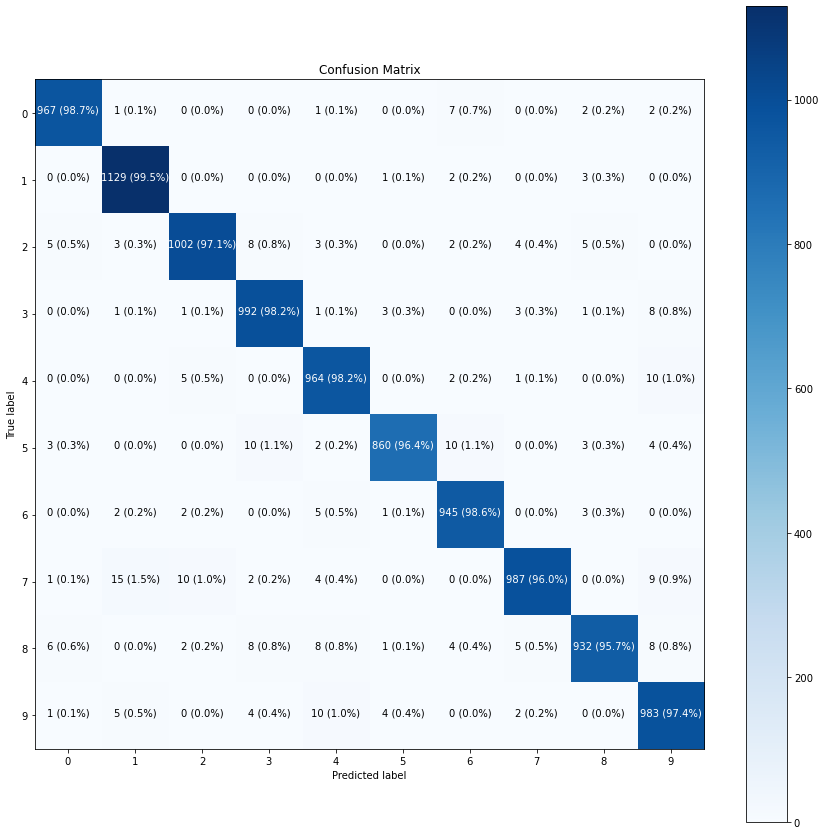

In [95]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [96]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  #plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                #100*np.max(predictions_array),
                                #class_names[true_label]),
                                #color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = predictions_array
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('lime')

Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

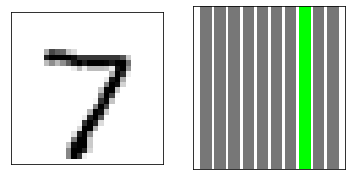

In [97]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_preds[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_preds[i],  y_test)
plt.show()

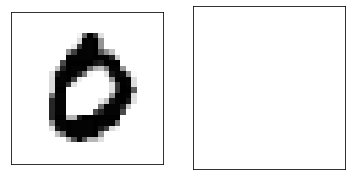

In [98]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_preds[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_preds[i],  y_test)
plt.show()

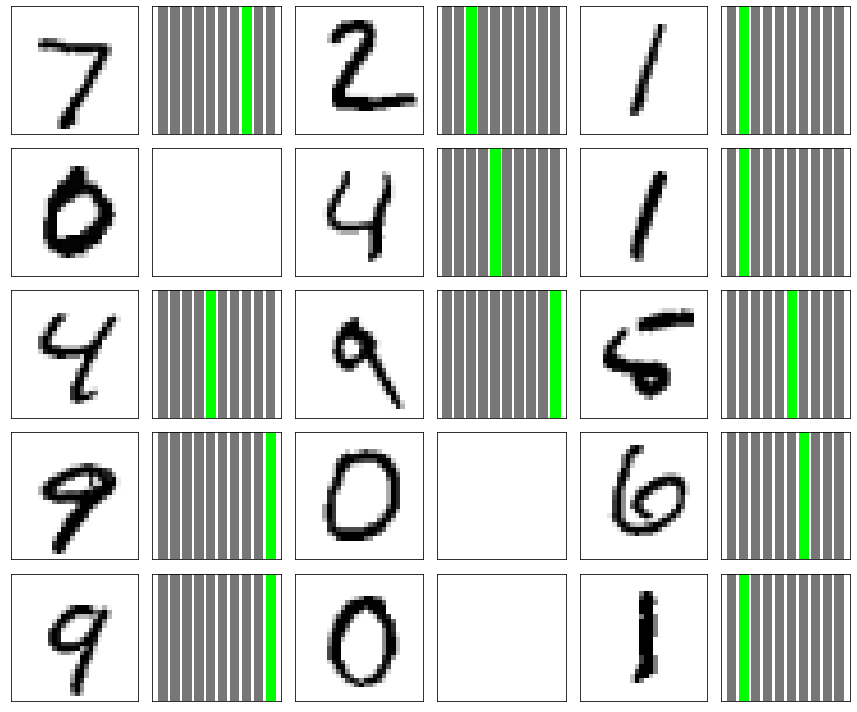

In [99]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_preds[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_preds[i], y_test)
plt.tight_layout()
plt.show()


## AIR QUALITY PREDICTION USING DEEP LEARNING ##

In [141]:
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
airdata=pd.read_csv('station_day.csv')


New_data=airdata.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
New_data=New_data.dropna()
New_data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [142]:
import numpy as np
X=New_data.iloc[:,[0,1,2,3,4,5,6,7,8,12]]

y=New_data['AQI_Bucket'].to_list()
for i in range(len(y)) :
    if(y[i]=='Very Poor'):
        y[i]=0
    elif (y[i]=='Poor'):
        y[i]=1
    elif (y[i]=='Moderate'):
        y[i]=2
    elif (y[i]=='Satisfactory'):
        y[i]=3
    elif (y[i]=='Good'):
        y[i]=4
    else:
        y[i]=5
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [143]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(100,input_dim = 10, activation='relu'))
#add output layer
classifier_e25.add(Dense(100, activation='relu'))
classifier_e25.add(Dense(80, activation='relu'))
classifier_e25.add(Dense(6,  activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_80 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_81 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_82 (Dense)             (None, 6)                 486       
Total params: 19,766
Trainable params: 19,766
Non-trainable params: 0
_________________________________________________________________


In [144]:
model=classifier_e25.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
484/484 [==============================] - 1s 2ms/step - loss: 2.3499 - accuracy: 0.4560 - val_loss: 0.9646 - val_accuracy: 0.5699
Epoch 2/100
484/484 [==============================] - 1s 3ms/step - loss: 1.0054 - accuracy: 0.5876 - val_loss: 0.8517 - val_accuracy: 0.6383
Epoch 3/100
484/484 [==============================] - 1s 2ms/step - loss: 0.8214 - accuracy: 0.6684 - val_loss: 0.7884 - val_accuracy: 0.6433
Epoch 4/100
484/484 [==============================] - 1s 2ms/step - loss: 0.6709 - accuracy: 0.7255 - val_loss: 0.6367 - val_accuracy: 0.7184
Epoch 5/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7869 - val_loss: 0.5388 - val_accuracy: 0.7768
Epoch 6/100
484/484 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.8191 - val_loss: 0.4419 - val_accuracy: 0.8254
Epoch 7/100
484/484 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8477 - val_loss: 0.3429 - val_accuracy: 0.8670

Epoch 58/100
484/484 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9553 - val_loss: 0.0786 - val_accuracy: 0.9778
Epoch 59/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9586 - val_loss: 0.0843 - val_accuracy: 0.9740
Epoch 60/100
484/484 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9518 - val_loss: 0.1032 - val_accuracy: 0.9723
Epoch 61/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9700 - val_loss: 0.0850 - val_accuracy: 0.9706
Epoch 62/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9686 - val_loss: 0.1380 - val_accuracy: 0.9471
Epoch 63/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9572 - val_loss: 0.0895 - val_accuracy: 0.9765
Epoch 64/100
484/484 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9721 - val_loss: 0.1469 - val_accuracy:

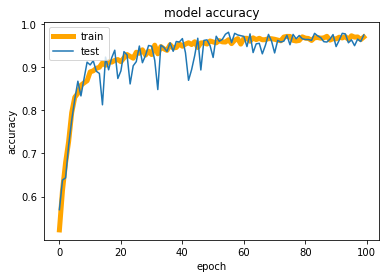

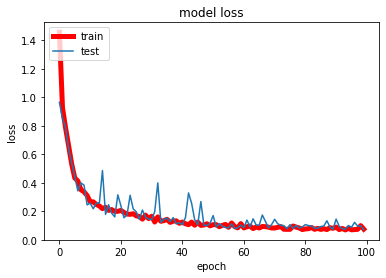

In [145]:
loss=list(model.history.values())[0]
accuracy=list(model.history.values())[1]
val_loss=list(model.history.values())[2]
val_accuracy=list(model.history.values())[3]

# summarize history for accuracy
plt.plot(accuracy,color='orange', linewidth=5)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss, color='red', linewidth=5)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Classification with Deep Learning

In [36]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.02, 
                    random_state=42)

In [37]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0


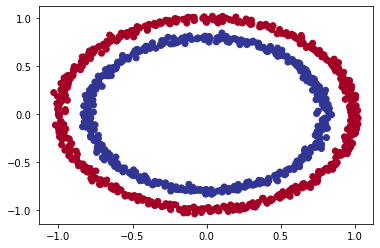

In [38]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [39]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob
   /master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org
    #/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [40]:
X_train=X[:800]
y_train=y[:800]
X_test=X[800:]
y_test=y[800:]

## Model 1 

In [41]:
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.linear), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.linear), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # ouput layer, sigmoid activation
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


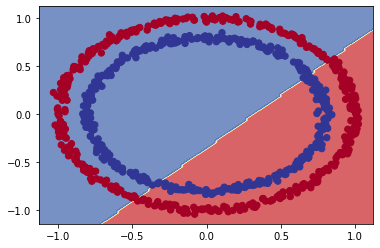

In [42]:
plot_decision_boundary(model_1, X_train, y_train)

In [43]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5750


[0.689868152141571, 0.574999988079071]

Our model 1 has a linear decision boundary and thus does not perform well in classifying our data. Now lets resort to non-linear activation functions.

## Model 2

In [44]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


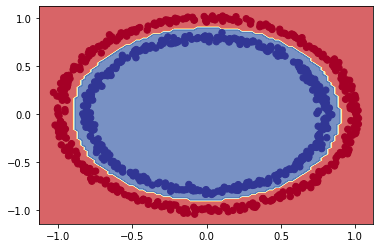

In [45]:
plot_decision_boundary(model_2, X_train, y_train)

In [46]:
model_2.evaluate(X_train, y_train)

25/25 [==============================] - 0s 836us/step - loss: 0.0016 - accuracy: 1.0000


[0.001596104702912271, 1.0]

Performs well with an accuracy of 99%

doing binary classifcation...
doing binary classifcation...


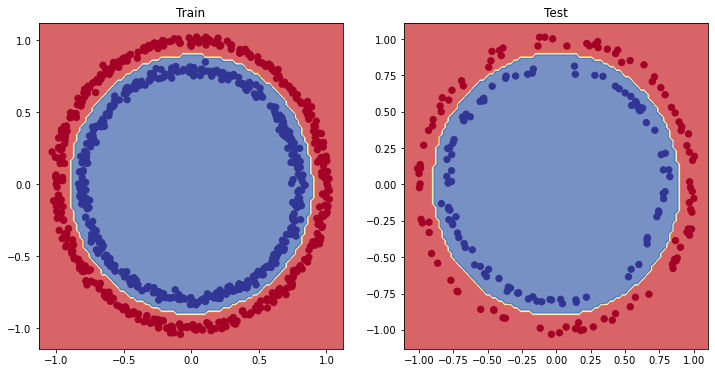

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X=X_test, y=y_test)
plt.show()

In [48]:
y_preds=model_2.predict(X_test)

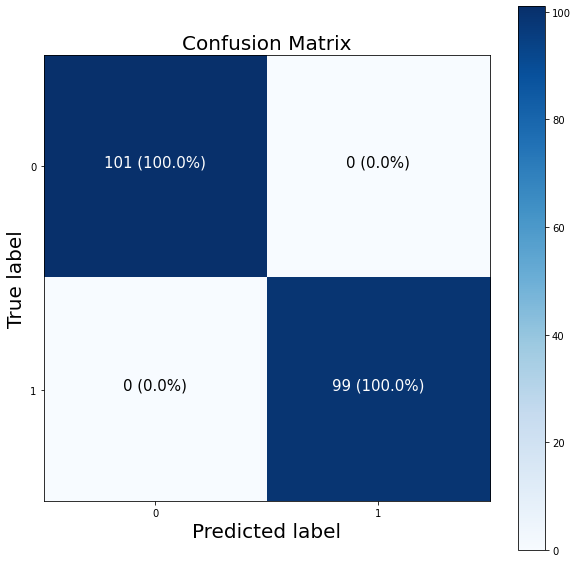

In [49]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/
#generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/
#basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Another Example

In [50]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("cwbdata.csv",header=None)
data.columns =['X1', 'X2', 'label']
data.head()

,X1,X2,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [51]:
import random
f1=data['X1'].to_list()
#Reshuffling data

f2=data['X2'].to_list()
label=data['label'].to_list()

X=[[f1[i],f2[i]] for i in range(len(f1))]
y=label


In [52]:
indices=[ 49,  81, 107,  25,  51,  12, 117,  13,  43,  37,  50,  60,  33,
       102,  42,  88,  99,   8,  80,  73,  97,  23, 110,  72,  10,  82,
        24,  40,  98,   1,  71,   5,  78,  84,  75,   3,   4,  46,  21,
        63,  93,  92,  68,  45, 105,  28,  31,  89,  14,  91,  20,  16,
        38,  67, 114,  17,  53,  83,  30,  56, 100,  52,  47,  57, 109,
        61,  41,  26, 111,  94,  35,   7,  95,  69,  87,  15,  11,  86,
       104,  66, 112,   9,  18,   6,  19,  48, 101,  34,  85, 103, 113,
        90,  62,  59,  76,  96,  44,  32,  77,   2, 115,   0,  27, 106,
        22, 116,  39,  36,  64,  74,  79,  54, 108,  55,  65,  70,  29,
        58]
X=[X[i] for i in indices]
y=[y[i] for i in indices]
X=np.array(X)
y=np.array(y)

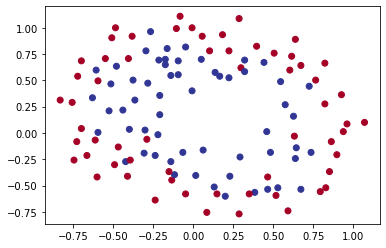

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [54]:
X_train=X[:90]
y_train=y[:90]
X_test=X[90:]
y_test=y[90:]

 ## model 3

In [55]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.linear), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.linear), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # ouput layer, sigmoid activation
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X, y, epochs=100, verbose=0)

doing binary classifcation...


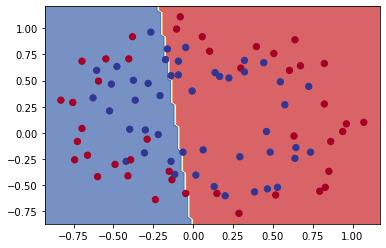

In [56]:
plot_decision_boundary(model_3, X_train, y_train)

In [57]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 156ms/step - loss: 0.6746 - accuracy: 0.6786


[0.6746087074279785, 0.6785714030265808]

## Model 4 

In [58]:
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),# hidden layer 1, ReLU activation
  tf.keras.layers.Dense(80, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs=50,verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5466
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.5406
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6529
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6550
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6936
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.7520
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7918
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7798
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7993
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7973
Epoch 11/50
4/4 [======================

doing binary classifcation...


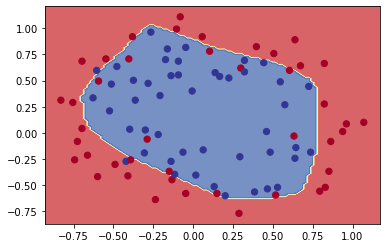

In [59]:
plot_decision_boundary(model_4, X_train, y_train)

In [60]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 0.3195 - accuracy: 0.8929


[0.3194580078125, 0.8928571343421936]

doing binary classifcation...
doing binary classifcation...


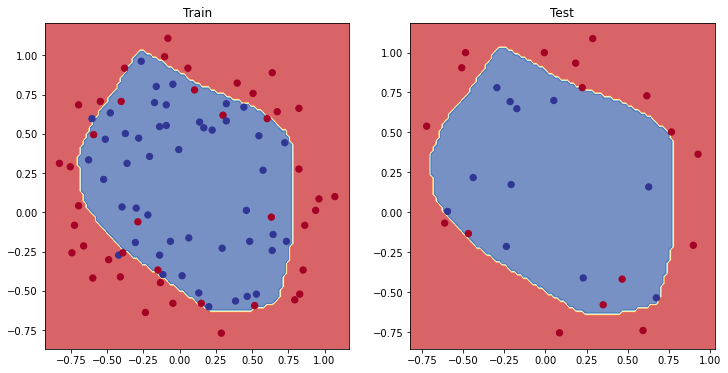

In [61]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [62]:
history = model_4.fit(X_train, y_train, epochs=100,verbose=0)

In [63]:
y_preds = model_4.predict(X_test)

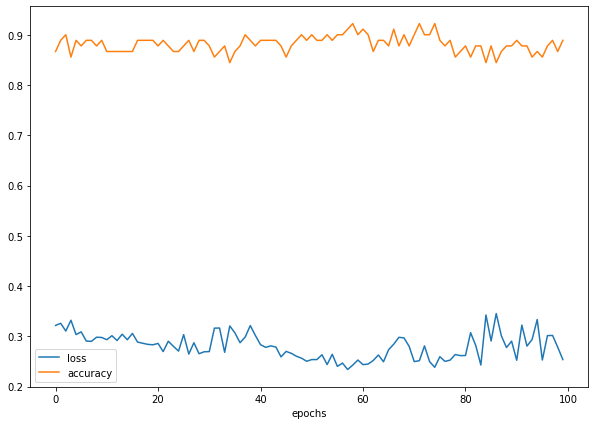

In [64]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[14,  3],
       [ 1, 10]])

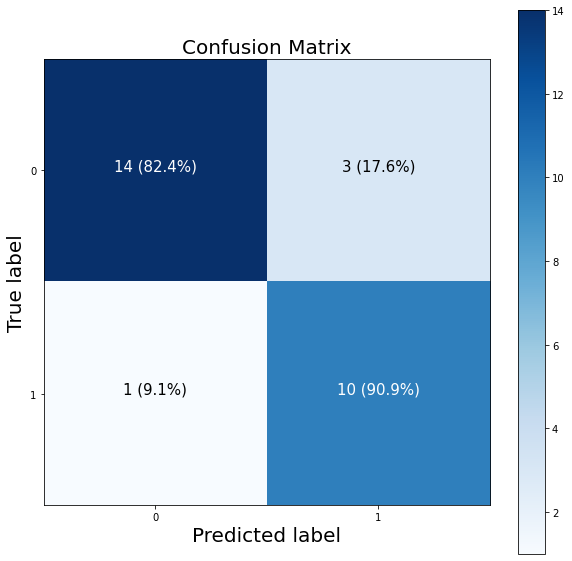

In [66]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/
#generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/
#basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)